<a href="https://colab.research.google.com/github/Ishita95-harvad/Apple-Stock-Price-Data-FINANCE.ipynb/blob/main/Apple_Stock_Price_Data_FINANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apple Stock Price Data FINANCE.ipynb**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL.csv


In [ ]:
import pandas as pd
import io

# Assuming you uploaded a file named 'my_data.csv'
uploaded_file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
df = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))  # Read the uploaded file into a pandas DataFrame
df.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1,1980-12-15,0.094005,0.094005,0.093575,0.093575,175884800
2,1980-12-16,0.087136,0.087136,0.086707,0.086707,105728000
3,1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
4,1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


**Preprocess Data**

Handle missing values

Encode categorical variables

Scale numerical data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop missing values
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features & target
# Replace 'TargetColumn' with the actual name of your target column
# For example, if your target is Open use:
X = df.drop("Open", axis=1)
y = df["Open"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train ML Model**

Train a model using RandomForestClassifier (or any other model of choice)

**Evaluates Performance**

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Import Regressor instead of Classifier
from sklearn.metrics import mean_squared_error, r2_score # Import appropriate metrics

# ... (rest of your code) ...

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42) # Use Regressor
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
# Use metrics suitable for regression
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.23609605628870803
R-squared: 0.999907537078115


**Visualization**

Plot confusion matrix using Seaborn:

Mean Squared Error: 0.23609605628870803
R-squared: 0.999907537078115


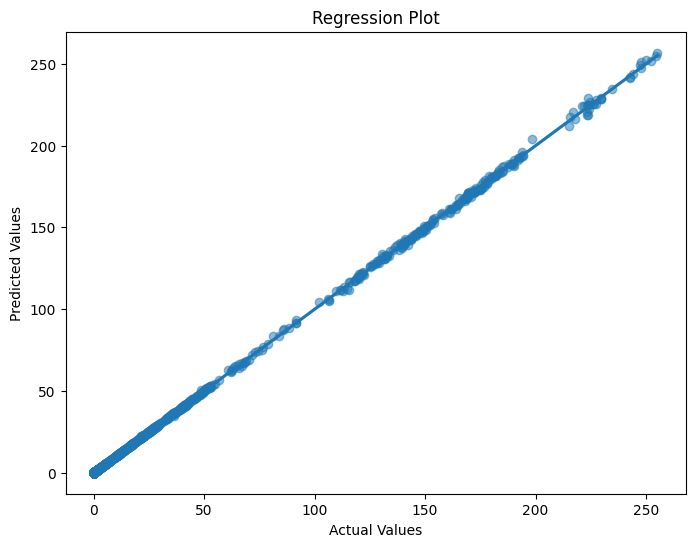

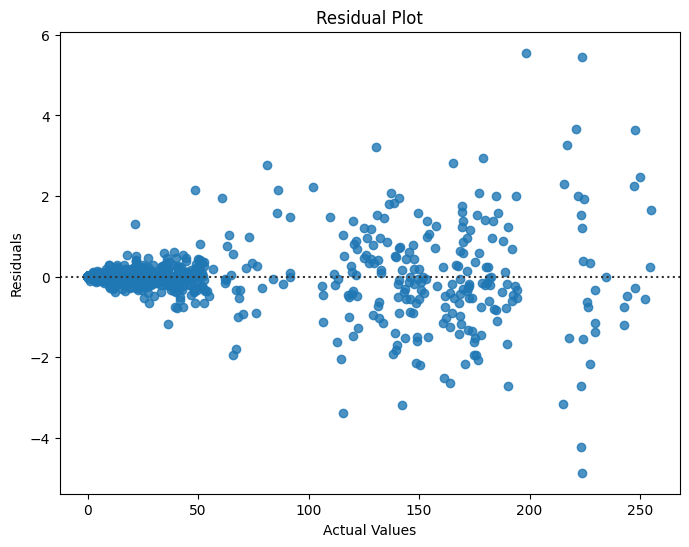

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# ... (your existing code) ...

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Visualization: Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})  # Use regplot for regression visualization
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot")
plt.show()

# Visualization: Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred)  # Use residplot for residual visualization
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



---


**Advanced ML workflow in Apple Stock Price Data FINANCE**

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
# Get the uploaded file name
uploaded_file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))  # Read the uploaded file into a pandas DataFrame
df.head()

Saving AAPL.csv to AAPL (2).csv


,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1,1980-12-15,0.094005,0.094005,0.093575,0.093575,175884800
2,1980-12-16,0.087136,0.087136,0.086707,0.086707,105728000
3,1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
4,1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


**Advanced Preprocessing**

Handle missing values

Encode categorical features

Apply Principal Component Analysis (PCA) for dimensionality reduction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Drop missing values
df.dropna(inplace=True)

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Replace 'TargetColumn' with the actual name of your target column
# For example, if your target is 'Open' use:
X = df.drop("Open", axis=1)  # Changed "TargetColumn" to "Open"
y = df["Open"]

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retains 95% variance
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


**Hyperparameter Tuning (Grid Search)**

Instead of using default parameters, optimize them using GridSearchCV:

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestRegressor(random_state=42)  # Use RandomForestRegressor

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}


**Advanced Model - Stacking Classifier**

Combine multiple models (RandomForest, XGBoost, Logistic Regression) for better predictions

In [20]:
!pip install scikit-learn xgboost
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression  # Or any other suitable regressor
from xgboost import XGBRegressor

# Define base models (use regressors)
base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=300, learning_rate=0.1))
]

# Define Stacking Model (use StackingRegressor)
stack_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train model
stack_model.fit(X_train, y_train)

# Predictions
y_pred = stack_model.predict(X_test)

**Model Explainability with SHAP**

SHAP helps understand feature importance

 99%|===================| 2196/2228 [01:22<00:01]       

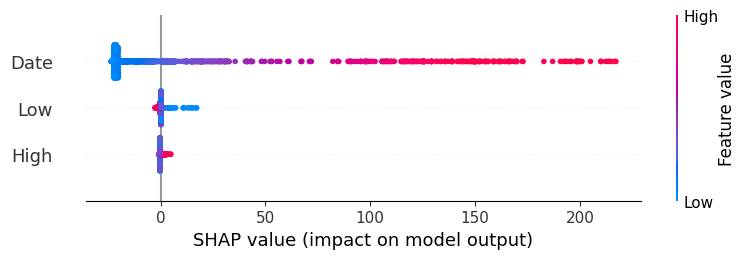

In [22]:
import shap

# Use TreeExplainer if base models are tree-based
explainer = shap.TreeExplainer(stack_model.named_estimators_['rf'], X_train)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=df.drop("Open", axis=1).columns)

**Deep Learning Alternative (Keras)**

For comparison, train a Neural Network

In [23]:
import tensorflow as tf
from tensorflow import keras

# Define NN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Change activation based on classification/regression
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
model.evaluate(X_test, y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0000e+00 - loss: -2460.3994 - val_accuracy: 0.0000e+00 - val_loss: -41227.2227
Epoch 2/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -99523.2891 - val_accuracy: 0.0000e+00 - val_loss: -394349.3125
Epoch 3/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -598199.5000 - val_accuracy: 0.0000e+00 - val_loss: -1318251.2500
Epoch 4/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: -1672127.1250 - val_accuracy: 0.0000e+00 - val_loss: -3048129.7500
Epoch 5/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -3724398.2500 - val_accuracy: 0.0000e+00 - val_loss: -5698093.0000
Epoch 6/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -6898112.0000 - val_accuracy: 0.0000e+00 - val_loss: -9336905.0000
Epoch 7/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -10363554.0000 - val_accu

[-531853952.0, 0.0]

**Visualization**

Confusion Matrix & SHAP Feature Importance

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Mean Squared Error: 3050.671986117583
R-squared: -0.19474272456391128


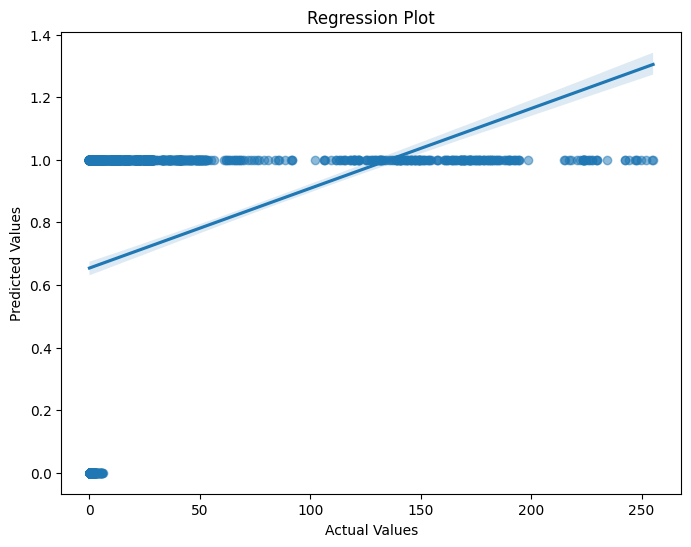

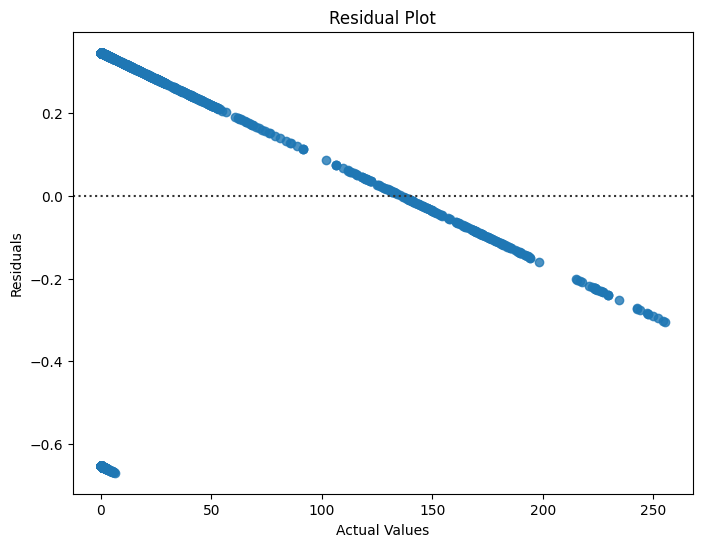

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# ... (your existing code) ...

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Visualization: Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})  # Use regplot for regression visualization
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot")
plt.show()

# Visualization: Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred)  # Use residplot for residual visualization
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**The dataset contains data from 12/12/1980 to 2/19/2025 for AAPL.**

**The csv has the following header:**

**Date,Open,High,Low,Close,Volume**
**Date: the date of the information**

**Open: price at market open**

**High: high price of the day**

**Low: lowest price of the day**

**Close: price at market close**

**Volume: volume of stock**